# Logistic Regression

In [1]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
# Load cleaned dataset

df = pd.read_csv("/Users/sa19/Desktop/Phase2TLAB1/Cleaned_dateset.csv")

# Separate features and target
X =df.drop(["isFraud"],axis=1)

# Target : "isFraud" column
y = df["isFraud"]



In [3]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((4771965, 10), (1590655, 10))

In [5]:
# Check the data type
X_train.dtypes


Unnamed: 0                   int64
transaction_amount           int64
oldbalanceOrg                int64
newbalanceOrig               int64
oldbalanceDest               int64
newbalanceDest               int64
transaction_type_CASH_OUT    int64
transaction_type_DEBIT       int64
transaction_type_PAYMENT     int64
transaction_type_TRANSFER    int64
dtype: object

In [6]:
# Trains a Logistic Regression model using the provided training data.
Model = LogisticRegression()
Model.fit (X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Confusion Matrix

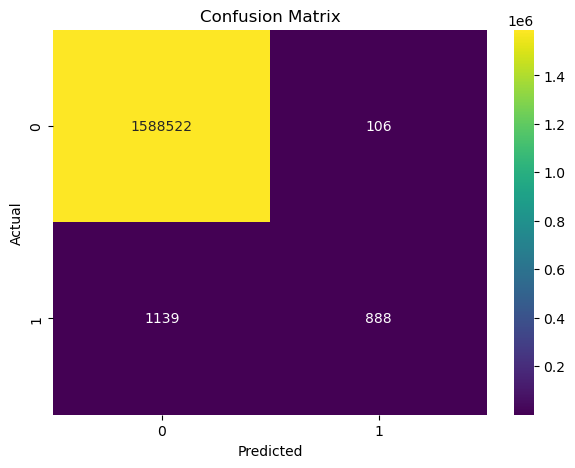

In [8]:
# Plot Confusion Maxtrix using x_test_,y_test & y_pred
y_pred = Model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Confusion Matrix Results
* **Top right(106):  Number of times the model incorrectly predicted "1" (fraudulent) when it was actually "0". The top right is considered "False Positives".**

* **Top left(1588522): Number of times the model correctly predicted "0" (not fraudulent) when it was actually "0". The top right quadrant is our "True Negatives"** 

* **Bottom right(888): Number of times the model correctly predicted "1" (fraudulent) when it was actually "1". This is our "True Positives".**

* **Top left(1139): Number of times the model incorrectly predicted "0" (not fraudulent) when it was actually "1". This is our "False Negatives".** 

## Conclusion 
**The model demonstrates strong performance in classifying non-fraudulent transactions. However, it exhibits a significant weakness in detecting fraudulent transactions, leading to a substantial number of missed cases. This is a critical issue, potentially exacerbated by the class imbalance present in the data.**

In [12]:
# Predict and evaluate
predictions = Model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy Score: 0.9992173035636263

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588628
           1       0.89      0.44      0.59      2027

    accuracy                           1.00   1590655
   macro avg       0.95      0.72      0.79   1590655
weighted avg       1.00      1.00      1.00   1590655



##  Accuracy Score 
* **The model has an accuracy score of 0.999 meaning overall proportion of correctly predicted instances (both fraudulent and non-fraudulent) out of the total prediction**

##  Classification Report

* **Class 0 (Non-Fraudulent):**
* F1-score: 1.00: The harmonic mean of precision and recall, indicating perfect balance.

* Support: 1588628: The number of actual "0" instances in the test set.

* **Class 1 (Fraudulent):**

* Precision: 0.89: When the model predicted "1" (fraudulent), it was correct 89% of the time. There were some false positives.

* Recall: 0.44: The model only correctly identified 44% of all actual "1"s. It missed a lot of fraudulent cases (false negatives).

* F1-score: 0.59: The F1-score is relatively low, indicating a poor balance between precision and recall for fraudulent transactions.

* Support: 2027: The number of actual "1" instances in the test set.

## Observations and Implications

* The model achieves very high overall accuracy, but this is misleading.

* The model performs well on the majority class (non-fraudulent), but poorly on the minority class (fraudulent).
The low recall for class 1 (fraud) is a serious concern. It means the model is missing a significant proportion of actual fraudulent transactions

* The data is heavily imbalanced, with far more non-fraudulent transactions than fraudulent ones


# Roc Curve

In [20]:
# ROC Curve Metrics

probablities = Model.predict_proba(X_test)[:,1]
#Calculate the False Positive Rate, True Postive Rate and Thresholds
fpr, tpr, thresholds  = roc_curve(y_test, y_pred)

# Calculate Auc score
Auc_score = roc_auc_score(y_test,y_pred)

# Print Auc_score
Auc_score


0.7190095584509973

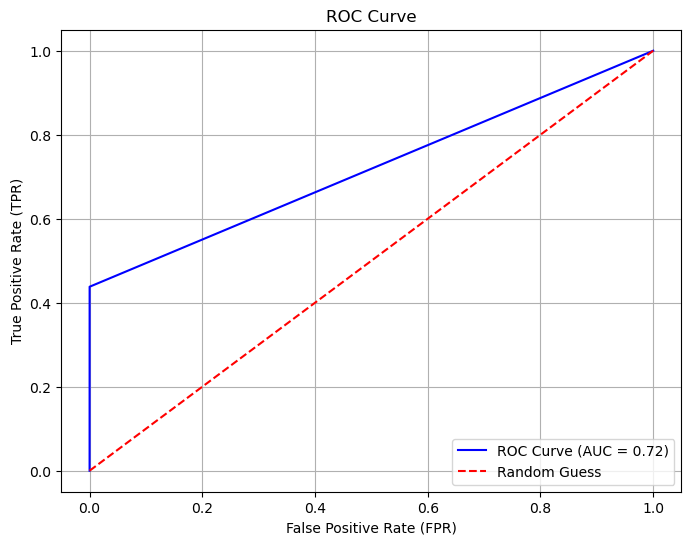

In [27]:
# plotting ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {Auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle="--", label="Random Guess")  # Baseline
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



# Roc Curve Results 

## Auc Score
* An AUC of 0.72 suggests that the model has a moderate ability to distinguish between the two classes Fraud & Not Fraud
* The score is exceptionally strong but is better tha random guessing
* This score mean the model can rank a randomly chosen positive case higher than a randomly chosen negative case about 72% of the time.

## Take Away
 * **An AUC of 0.72 means the model has some ability to identify fraudulent transactions, but there's room for improvement.**

 * **While it's better than random, it might still miss a significant portion of fraud cases.**
 
 * **This Auc score is decent, but depending on the cost associated with missing a fraudulant transaction, may or may not be acceptable.**

